## Small introduction to Numpy

## Fast, faster, NumPy

<img src="images/numpy.png"  width=200 align=right />

Numpy allows us to run mathematical operations over calculations in a efficiant manner. 
Numpy provides several advantages for python user:

- powerful n-dimensional arrays
- advanced functions
- can integrate C/C++ and Fortran code
- efficient linear  algebra, random number generation and Fourier transformation 


### Vectorization

When looping over an list or an array, there’s a lot of overhead involved. Vectorized operations in NumPy delegate the looping internally to highly optimized C and Fortran functions.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"Let's test the speed of numpy and create an array consisting of True and False. Assume we want to count how many times we have a transition from True to False or the other way round. First we will use a classic Python loop

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np

np.random.seed(123)
x = np.random.choice([False, True], size=100000)

In [2]:
def transitions(x):
    count = 0
    for i, j in zip(x[:-1], x[1:]):
        if j and not i:
            count += 1
    return count

#transitions(x)
%timeit transitions(x)

6.13 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now can try the same with numpy

In [3]:
%timeit np.count_nonzero(x[:-1] < x[1:])

98.5 µs ± 881 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Numpy arrays

The core class is the numpy ndarray (n-dimensional array). We can initialize a numpy array from nested Python lists.

#### Differences Between Python Lists and Numpy Arrays

- All elements in a numpy arrays must be the same data type

- Numpy arrays support arithmetic and other mathematical operations that run on each element of the array

- Numpy arrays can store data along multiple dimensions. This makes numpy arrays a very efficient data structure for large datasets.

This first example below shows how to generate different numpy arrays. For numpy arrays, brackets ```[]``` are used to assign and identify the dimensions of the numpy arrays. First we want to create a 1-dimensional array.

In [4]:
avg_precip = np.array([0.70, 0.75, 1.85, 1.90, 1.20, 0.9])

print(avg_precip)

[0.7  0.75 1.85 1.9  1.2  0.9 ]


In order to create a 2-dimensional array, we need to specify two sets of brackets ```[]```, the outer set that defines the entire array structure and inner sets that define the rows of the individual arrays. 

In [5]:
min_max_temp_monthly = np.array([
    [-2.11, -2.34, 1.40, 4.22, 9.34, 12.65, 14.26, 14.33, 11.19, 6.03, 2.33, 0.12],
    [3.00, 4.00, 9.33, 13.45, 19.72, 22.94, 24.99, 24.03, 19.28, 13.44, 7.03, 4.33]
])

print(min_max_temp_monthly)

[[-2.11 -2.34  1.4   4.22  9.34 12.65 14.26 14.33 11.19  6.03  2.33  0.12]
 [ 3.    4.    9.33 13.45 19.72 22.94 24.99 24.03 19.28 13.44  7.03  4.33]]


Of course we can create as many dimensions we want

In [ ]:
# 3-dimensional array
multi_array = np.array([[[1,2,3,4], [5,6,7,8], [9,10,11,12],[13,14,15,16]],[[17,18,19,20], [21,22,23,24], [25,26,27,28],[30,31,32,33]]])
multi_array

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24],
        [25, 26, 27, 28],
        [30, 31, 32, 33]]])

Numpy also has some in-built functions to create certain types of numpy arrays.

In [9]:
a = np.zeros((2,2))   # Create an array of all zeros
a                     # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
b                    # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
c                      # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
d                     # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
e                            # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"
    
f = np.linspace(1, 15, 3)   # The linspace() function returns numbers evenly spaced over a specified intervals.
f                           # Say we want 3 evenly spaced points from 1 to 15, we can easily use this.
                            # linspace() takes the third argument as the number of datapoints to be created
    
g= np.arange(3,10)           # Lists the natural numbers from 3 to 9, as the number in the second position is excluded
g

array([[0., 0.],
       [0., 0.]])

array([[1., 1.]])

array([[7, 7],
       [7, 7]])

array([[1., 0.],
       [0., 1.]])

array([[0.56571867, 0.39707456],
       [0.52855537, 0.18090165]])

array([ 1.,  8., 15.])

array([3, 4, 5, 6, 7, 8, 9])

Lets import the data into numpy and see what are we dealing with. Therefore we can use the ```np.genfromtxt()``` function

In [11]:
station_data = np.genfromtxt('../data/monthly_climate_wuerzburg_18810101_20201231.txt', skip_header=1, delimiter = ';' )
station_data

array([[ 5.7050000e+03,  1.8810101e+07,  1.8810131e+07, ...,
        -9.9900000e+02, -9.9900000e+02,            nan],
       [ 5.7050000e+03,  1.8810201e+07,  1.8810228e+07, ...,
        -9.9900000e+02, -9.9900000e+02,            nan],
       [ 5.7050000e+03,  1.8810301e+07,  1.8810331e+07, ...,
        -9.9900000e+02, -9.9900000e+02,            nan],
       ...,
       [ 5.7050000e+03,  2.0201001e+07,  2.0201031e+07, ...,
         4.2800000e+01,  6.4000000e+00,            nan],
       [ 5.7050000e+03,  2.0201101e+07,  2.0201130e+07, ...,
         1.2800000e+01,  4.9000000e+00,            nan],
       [ 5.7050000e+03,  2.0201201e+07,  2.0201231e+07, ...,
         4.4800000e+01,  9.7000000e+00,            nan]])

We can now start to work with the data. First let us have look at our data

In [12]:
type(station_data)
station_data.shape
station_data.dtype

numpy.ndarray

(1680, 17)

dtype('float64')

Okay we can see that we now have created a numpy array with 1680 rows and 17 columns. The data are floating point values with 64-bit precision. 

### Working with numpy data - Index and slicing

<img src="images/anatomyarray.png"  width=800 />

Accessing single values in a 1-dimensional numpy array is straight forward. Always remember that indexing starts with 0.

In [14]:
avg_precip = np.array([0.70, 0.75, 1.85, 1.90, 1.20, 0.9])

avg_precip[0] 
avg_precip[3]

0.7

1.9

In case of our station data we are dealing with a 2-dimensional datset. So if we want to access one value we just need one index for each dimsension

In [16]:
station_data[0,0]

5705.0

Similar to Python lists, numpy arrays can be sliced

In [17]:
station_data[:5,0]
station_data[:5,:2]

array([5705., 5705., 5705., 5705., 5705.])

array([[5.7050000e+03, 1.8810101e+07],
       [5.7050000e+03, 1.8810201e+07],
       [5.7050000e+03, 1.8810301e+07],
       [5.7050000e+03, 1.8810401e+07],
       [5.7050000e+03, 1.8810501e+07]])

Let's use this technique to slice our data up into different columns and creating new variables with the column data. The idea is to cut our 2D data into 3 separate columns that will be easier to work with. We will use following columns MESS_DATUM_BEGINN (start of measurement), MO_TN (Monthly mean of the air temperature minimum), MO_TX(Monthly mean of the air temperature maximum)

In [18]:
date = station_data[:, 1]
temp_max = station_data[:, 8]
temp_min = station_data[:, 9]

Now we can already start to do some basic calculations.Useful methods include mean(), min(), max(), and std().

In [19]:
date.min()
date.max()

18810101.0

20201201.0

Okay we now know that we have measurements from January 1881 until December 2020. Let's calculate the mean monthly maximum


In [20]:
temp_max.mean()

-470.9963154761905

Ooops! This seems wrong. Let's have a look at our data again

In [21]:
temp_max

array([-999.  , -999.  , -999.  , ...,    2.52,    2.03,    2.35])

We can see that we have a lot of values with -999. These are no data values. In order to make correct calculations we first have to clean our dataset. First, we need to identify a useful test for identifying missing data. We could could convert the data to integer values everywhere and test for values being equal to -999, but there’s an even easier option. Since we know all of our data are dates or temperatures, we can simply look for numbers below -998 to identify missing data

In [22]:
data_mask = (station_data < -998)
station_data[data_mask] = np.nan
station_data

array([[5.7050000e+03, 1.8810101e+07, 1.8810131e+07, ...,           nan,
                  nan,           nan],
       [5.7050000e+03, 1.8810201e+07, 1.8810228e+07, ...,           nan,
                  nan,           nan],
       [5.7050000e+03, 1.8810301e+07, 1.8810331e+07, ...,           nan,
                  nan,           nan],
       ...,
       [5.7050000e+03, 2.0201001e+07, 2.0201031e+07, ..., 4.2800000e+01,
        6.4000000e+00,           nan],
       [5.7050000e+03, 2.0201101e+07, 2.0201130e+07, ..., 1.2800000e+01,
        4.9000000e+00,           nan],
       [5.7050000e+03, 2.0201201e+07, 2.0201231e+07, ..., 4.4800000e+01,
        9.7000000e+00,           nan]])

In [23]:
date = station_data[:, 1]
temp_max = station_data[:, 8]
temp_min = station_data[:, 9]
temp_max.mean()

nan

In the last example we can see that min() and the max() function returned nan. If we just want to get our min and max value we could use the nanmin()/nanmax() function in numpy

In [24]:
np.nanmin(temp_max)
np.nanmax(temp_max)

0.46

3.62

But let's assume we want to get rid of the nan values. First of all we can count all missing values in our tavg array. To do this, we’ll need two new NumPy function, called np.count_nonzero() and np.isnan(). 

In [25]:
print("Number of missing dates:", np.count_nonzero(np.isnan(temp_min)))

Number of missing dates: 795


Now we now the number of nan values in the tavg array. Let's remove them

In [26]:
clean_data = ~np.isnan(temp_min)
temp_min_clean = temp_min[clean_data ]
temp_min_clean

array([25.7, 30. , 36.3, 37.8, 35.3, 34.8, 25.2, 15.9, 10.4, 12.4, 12.1,
       21.4, 27.1, 28. , 32.5, 32.8, 32.8, 29.1, 23.6, 14.6, 10.1,  9.6,
       12.3, 23.6, 29.5, 27.6, 28.1, 33.6, 34.8, 34. , 22.8, 13.9, 12. ,
        9.5, 13.6, 18.6, 21.6, 31.3, 33.9, 32.7, 33.7, 26. , 20. , 14.4,
       11.6,  9.1, 11.5, 15.5, 25.3, 26. , 28.8, 32.8, 32.5, 32. , 19.6,
       15. ,  8.5, 10.1,  7.8, 16. , 24.7, 27.2, 32.7, 37.6, 35.1, 20.6,
       15.2, 11.4,  8.8, 10. , 12. , 21. , 23.6, 31.8, 27.5, 29.4, 32. ,
       33. , 21. , 14.9, 13.2, 11.8,  8.2, 17. , 17.8, 28.5, 33.2, 26.1,
       31.1, 28.5, 21.4, 14.2, 10.4, 10. , 10.5, 20.1, 28.4, 27.5, 27.6,
       31.9, 27.6, 26.1, 19. , 16.8, 12. , 10.9,  4. , 20. , 19.5, 29.4,
       25.7, 28.1, 26.8, 24.4, 25.4,  9. , 12.9, 11.2, 17.8, 19.9, 22.7,
       23.7, 31.7, 36.7, 26.9, 28.4, 19.4, 14.8, 11.2, 10.2, 18.5, 15.9,
       18.9, 27.5, 28.4, 29.1, 30.9, 28.6, 21.8, 11.2, 11.2, 13.7,  9.2,
       18.4, 24.9, 26. , 29.4, 35.1, 30.3, 28.4, 23

And of course we can use the same mask to clean also the other arrays

In [27]:
clean_date = date[clean_data] 
temp_max_clean = temp_max[clean_data] 
temp_max_clean

array([1.82, 0.86, 1.03, 1.19, 1.16, 1.14, 0.46, 1.6 , 1.51, 1.7 , 1.36,
       0.94, 1.57, 1.05, 1.19, 1.41, 1.29, 0.95, 1.25, 0.88, 0.96, 1.78,
       1.21, 1.42, 1.55, 1.36, 1.17, 1.04, 1.07, 0.62, 0.78, 1.22, 1.74,
       1.08, 1.76, 0.93, 2.07, 1.11, 0.9 , 2.06, 1.73, 2.5 , 1.69, 2.73,
       1.87, 2.35, 1.87, 2.74, 2.37, 1.96, 1.84, 1.67, 1.67, 1.39, 1.35,
       2.59, 1.83, 2.95, 2.22, 2.09, 1.51, 2.55, 2.36, 2.16, 1.48, 1.9 ,
       1.84, 1.81, 1.6 , 1.35, 1.66, 1.3 , 1.52, 1.9 , 1.4 , 1.64, 2.12,
       2.31, 1.28, 1.7 , 2.  , 3.28, 2.34, 2.34, 2.75, 2.3 , 2.14, 3.17,
       2.03, 2.72, 2.28, 2.17, 3.27, 2.55, 2.97, 2.86, 2.88, 2.96, 2.31,
       2.38, 1.63, 2.  , 2.01, 2.03, 3.09, 3.24, 2.01, 2.86, 2.67, 2.29,
       2.82, 2.43, 2.53, 1.73, 2.06, 2.66, 2.53, 2.21, 2.76, 2.3 , 2.02,
       2.19, 1.8 , 2.17, 2.26, 2.28, 1.27, 2.16, 2.15, 2.9 , 3.21, 2.03,
       2.68, 2.19, 2.07, 2.17, 2.02, 1.94, 1.98, 1.89, 2.43, 2.91, 1.63,
       1.54, 2.31, 2.15, 2.25, 2.13, 1.98, 1.47, 1.

Of course we can use always matplotlib to visualize our data

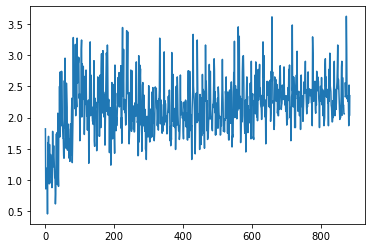

In [28]:
import matplotlib.pylab as plt
plt.plot(temp_max_clean)

OK, now let’s use a range of dates to find the average maximum temperature for one year. In this case, let’s go for 2010.

In [29]:
temp_min_2010 = temp_min_clean[(clean_date >= 20100101) & (clean_date <= 20101231)]
temp_min_2010.mean()

21.974999999999998

Next we want to calculate average monthly temperatures. Therefor we first need to convert our dates to strings

In [30]:
date_clean_str = (clean_date.astype(int)).astype(str)
date_clean_str

array(['19470401', '19470501', '19470601', '19470701', '19470801',
       '19470901', '19471001', '19471101', '19471201', '19480101',
       '19480201', '19480301', '19480401', '19480501', '19480601',
       '19480701', '19480801', '19480901', '19481001', '19481101',
       '19481201', '19490101', '19490201', '19490301', '19490401',
       '19490501', '19490601', '19490701', '19490801', '19490901',
       '19491001', '19491101', '19491201', '19500101', '19500201',
       '19500301', '19500401', '19500501', '19500601', '19500701',
       '19500801', '19500901', '19501001', '19501101', '19501201',
       '19510101', '19510201', '19510301', '19510401', '19510501',
       '19510601', '19510701', '19510801', '19510901', '19511001',
       '19511101', '19511201', '19520101', '19520201', '19520301',
       '19520401', '19520501', '19520601', '19520701', '19520801',
       '19520901', '19521001', '19521101', '19521201', '19530101',
       '19530201', '19530301', '19530401', '19530501', '195306

Now we can only extract the year of our dates

In [31]:
year = [datenow[0:4] for datenow in date_clean_str]
year = np.array(year)
year

array(['1947', '1947', '1947', '1947', '1947', '1947', '1947', '1947',
       '1947', '1948', '1948', '1948', '1948', '1948', '1948', '1948',
       '1948', '1948', '1948', '1948', '1948', '1949', '1949', '1949',
       '1949', '1949', '1949', '1949', '1949', '1949', '1949', '1949',
       '1949', '1950', '1950', '1950', '1950', '1950', '1950', '1950',
       '1950', '1950', '1950', '1950', '1950', '1951', '1951', '1951',
       '1951', '1951', '1951', '1951', '1951', '1951', '1951', '1951',
       '1951', '1952', '1952', '1952', '1952', '1952', '1952', '1952',
       '1952', '1952', '1952', '1952', '1952', '1953', '1953', '1953',
       '1953', '1953', '1953', '1953', '1953', '1953', '1953', '1953',
       '1953', '1954', '1954', '1954', '1954', '1954', '1954', '1954',
       '1954', '1954', '1954', '1954', '1954', '1955', '1955', '1955',
       '1955', '1955', '1955', '1955', '1955', '1955', '1955', '1955',
       '1955', '1956', '1956', '1956', '1956', '1956', '1956', '1956',
      

...now we do the same for month and day

In [32]:
month = [datenow[4:6] for datenow in date_clean_str]
month = np.array(month)
day = [datenow[6:8] for datenow in date_clean_str]
day = np.array(day)

Let’s take 2010 again as our example and find the average temperatures for each month in 2010

In [33]:
means_2010 = np.zeros(12)
index = 0

In [34]:
for month_now in np.unique(month):
    means_2010[index] = temp_min_clean[(month == month_now) & (year == '2010')].mean()
    index = index + 1
    
print(means_2010)

[ 5.7 15.7 22.4 26.4 26.3 31.2 36.2 30.2 24.4 20.7 19.2  5.3]


In [35]:
temp_mean = np.zeros(temp_min_clean.shape)
for i, temp in enumerate(temp_min_clean):
    temp_mean[i] = (temp_min_clean[i] + temp_max_clean[i]) / 2

In [36]:
temp_mean

array([13.76 , 15.43 , 18.665, 19.495, 18.23 , 17.97 , 12.83 ,  8.75 ,
        5.955,  7.05 ,  6.73 , 11.17 , 14.335, 14.525, 16.845, 17.105,
       17.045, 15.025, 12.425,  7.74 ,  5.53 ,  5.69 ,  6.755, 12.51 ,
       15.525, 14.48 , 14.635, 17.32 , 17.935, 17.31 , 11.79 ,  7.56 ,
        6.87 ,  5.29 ,  7.68 ,  9.765, 11.835, 16.205, 17.4  , 17.38 ,
       17.715, 14.25 , 10.845,  8.565,  6.735,  5.725,  6.685,  9.12 ,
       13.835, 13.98 , 15.32 , 17.235, 17.085, 16.695, 10.475,  8.795,
        5.165,  6.525,  5.01 ,  9.045, 13.105, 14.875, 17.53 , 19.88 ,
       18.29 , 11.25 ,  8.52 ,  6.605,  5.2  ,  5.675,  6.83 , 11.15 ,
       12.56 , 16.85 , 14.45 , 15.52 , 17.06 , 17.655, 11.14 ,  8.3  ,
        7.6  ,  7.54 ,  5.27 ,  9.67 , 10.275, 15.4  , 17.67 , 14.635,
       16.565, 15.61 , 11.84 ,  8.185,  6.835,  6.275,  6.735, 11.48 ,
       15.64 , 15.23 , 14.955, 17.14 , 14.615, 14.05 , 10.505,  9.415,
        7.545,  7.07 ,  3.005, 11.43 , 11.085, 15.845, 14.26 , 15.265,
      

Fortunatly we don't need a loop to make element-wise calculations. 

In [37]:
arr = np.arange(1,21)          # Numbers from 1 to 20
arr
arr * arr             # Multiplies each element by itself 
arr - arr             # Subtracts each element from itself
arr + arr             # Adds each element to itself
arr / arr             # Divides each element by itself

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361, 400])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [38]:
temp_mean = (temp_min_clean + temp_max_clean) / 2
temp_mean

array([13.76 , 15.43 , 18.665, 19.495, 18.23 , 17.97 , 12.83 ,  8.75 ,
        5.955,  7.05 ,  6.73 , 11.17 , 14.335, 14.525, 16.845, 17.105,
       17.045, 15.025, 12.425,  7.74 ,  5.53 ,  5.69 ,  6.755, 12.51 ,
       15.525, 14.48 , 14.635, 17.32 , 17.935, 17.31 , 11.79 ,  7.56 ,
        6.87 ,  5.29 ,  7.68 ,  9.765, 11.835, 16.205, 17.4  , 17.38 ,
       17.715, 14.25 , 10.845,  8.565,  6.735,  5.725,  6.685,  9.12 ,
       13.835, 13.98 , 15.32 , 17.235, 17.085, 16.695, 10.475,  8.795,
        5.165,  6.525,  5.01 ,  9.045, 13.105, 14.875, 17.53 , 19.88 ,
       18.29 , 11.25 ,  8.52 ,  6.605,  5.2  ,  5.675,  6.83 , 11.15 ,
       12.56 , 16.85 , 14.45 , 15.52 , 17.06 , 17.655, 11.14 ,  8.3  ,
        7.6  ,  7.54 ,  5.27 ,  9.67 , 10.275, 15.4  , 17.67 , 14.635,
       16.565, 15.61 , 11.84 ,  8.185,  6.835,  6.275,  6.735, 11.48 ,
       15.64 , 15.23 , 14.955, 17.14 , 14.615, 14.05 , 10.505,  9.415,
        7.545,  7.07 ,  3.005, 11.43 , 11.085, 15.845, 14.26 , 15.265,
      

You can also use the functions provided by numpy itself

In [39]:
x = np.array([[1,2,3,4],[5,6,7,8]])
y = np.array([[7,8,9,10],[11,12,13,14]])

# Elementwise sum
np.add(x, y)

# Elementwise difference
np.subtract(x, y)

# Elementwise product
np.multiply(x, y)

# Elementwise division
np.divide(x, y)

# Elementwise square root
np.sqrt(x)

array([[ 8, 10, 12, 14],
       [16, 18, 20, 22]])

array([[-6, -6, -6, -6],
       [-6, -6, -6, -6]])

array([[  7,  16,  27,  40],
       [ 55,  72,  91, 112]])

array([[0.14285714, 0.25      , 0.33333333, 0.4       ],
       [0.45454545, 0.5       , 0.53846154, 0.57142857]])

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712]])

In [40]:
temp_mean = np.divide(np.add(temp_min_clean, temp_max_clean), 2)
temp_mean

array([13.76 , 15.43 , 18.665, 19.495, 18.23 , 17.97 , 12.83 ,  8.75 ,
        5.955,  7.05 ,  6.73 , 11.17 , 14.335, 14.525, 16.845, 17.105,
       17.045, 15.025, 12.425,  7.74 ,  5.53 ,  5.69 ,  6.755, 12.51 ,
       15.525, 14.48 , 14.635, 17.32 , 17.935, 17.31 , 11.79 ,  7.56 ,
        6.87 ,  5.29 ,  7.68 ,  9.765, 11.835, 16.205, 17.4  , 17.38 ,
       17.715, 14.25 , 10.845,  8.565,  6.735,  5.725,  6.685,  9.12 ,
       13.835, 13.98 , 15.32 , 17.235, 17.085, 16.695, 10.475,  8.795,
        5.165,  6.525,  5.01 ,  9.045, 13.105, 14.875, 17.53 , 19.88 ,
       18.29 , 11.25 ,  8.52 ,  6.605,  5.2  ,  5.675,  6.83 , 11.15 ,
       12.56 , 16.85 , 14.45 , 15.52 , 17.06 , 17.655, 11.14 ,  8.3  ,
        7.6  ,  7.54 ,  5.27 ,  9.67 , 10.275, 15.4  , 17.67 , 14.635,
       16.565, 15.61 , 11.84 ,  8.185,  6.835,  6.275,  6.735, 11.48 ,
       15.64 , 15.23 , 14.955, 17.14 , 14.615, 14.05 , 10.505,  9.415,
        7.545,  7.07 ,  3.005, 11.43 , 11.085, 15.845, 14.26 , 15.265,
      

### Using functions

This makes it quite easy for us to do math with numpy. For example we could convert our temperature from Celsius to Fahrenheit 

In [41]:
mean_clean_F = 1.8 * temp_mean + 32
mean_clean_F

array([56.768, 59.774, 65.597, 67.091, 64.814, 64.346, 55.094, 47.75 ,
       42.719, 44.69 , 44.114, 52.106, 57.803, 58.145, 62.321, 62.789,
       62.681, 59.045, 54.365, 45.932, 41.954, 42.242, 44.159, 54.518,
       59.945, 58.064, 58.343, 63.176, 64.283, 63.158, 53.222, 45.608,
       44.366, 41.522, 45.824, 49.577, 53.303, 61.169, 63.32 , 63.284,
       63.887, 57.65 , 51.521, 47.417, 44.123, 42.305, 44.033, 48.416,
       56.903, 57.164, 59.576, 63.023, 62.753, 62.051, 50.855, 47.831,
       41.297, 43.745, 41.018, 48.281, 55.589, 58.775, 63.554, 67.784,
       64.922, 52.25 , 47.336, 43.889, 41.36 , 42.215, 44.294, 52.07 ,
       54.608, 62.33 , 58.01 , 59.936, 62.708, 63.779, 52.052, 46.94 ,
       45.68 , 45.572, 41.486, 49.406, 50.495, 59.72 , 63.806, 58.343,
       61.817, 60.098, 53.312, 46.733, 44.303, 43.295, 44.123, 52.664,
       60.152, 59.414, 58.919, 62.852, 58.307, 57.29 , 50.909, 48.947,
       45.581, 44.726, 37.409, 52.574, 51.953, 60.521, 57.668, 59.477,
      